In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import statsmodels.api as sm
import pylab as py
from scipy.stats import ttest_1samp

In [2]:
import pandas as pd

data = pd.read_excel("Central parking dataset.xls")

data_s = pd.read_excel("Central parking dataset.xls", sheet_name=1)

data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday,NaN,Legend,NaN
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday,NaN,Amount,Description
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday,NaN,300,Charged for loss of ticket
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday,NaN,0,Government vechicel
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday,NaN,NaN,NaN


In [3]:
data_s.head()

,Vehicle,Equipment,DateIn,Unnamed: 3,DateOut,Unnamed: 5,Amount,TimeDiff,Ticket_Type,Weekday,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday,NaN,Legend,NaN
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday,NaN,Amount,Description
2,1,6,2009-07-04,12:08:00,2009-07-04,13:58:00,0,110,Pass,Saturday,NaN,0,Pass holders
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday,NaN,300,Charged for loss of ticket
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday,NaN,NaN,NaN


Business Situation- 

Want to manage traffic

In [4]:
data.columns

Index(['Vehicle', 'Equipment', 'DateIn', 'Time In', 'DateOut', 'Time Out',
       'Amount', 'TimeDiff', 'Ticket_Type', 'Weekday', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [5]:
data_s.columns

Index(['Vehicle', 'Equipment', 'DateIn', 'Unnamed: 3', 'DateOut', 'Unnamed: 5',
       'Amount', 'TimeDiff', 'Ticket_Type', 'Weekday', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [6]:
data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday


In [7]:
data_s.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], inplace=True)
data_s.rename(columns = {'Unnamed: 3':'Time In','Unnamed: 5':'Time Out'}, inplace = True)
data_s.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday
2,1,6,2009-07-04,12:08:00,2009-07-04,13:58:00,0,110,Pass,Saturday
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday


In [8]:
data.describe()

,Vehicle,Equipment,Amount,TimeDiff
count,5000.0,5000.000000,5000.000000,5000.000000
mean,1.0,5.630000,36.848000,135.982000
std,0.0,0.912615,28.477835,83.881267
min,1.0,5.000000,30.000000,2.000000
25%,1.0,5.000000,30.000000,76.000000
50%,1.0,5.000000,30.000000,122.000000
75%,1.0,6.000000,40.000000,179.000000
max,1.0,8.000000,300.000000,722.000000


In [9]:
data_s.describe()

,Vehicle,Equipment,Amount,TimeDiff
count,4995.0,4995.000000,4995.000000,4995.000000
mean,1.0,5.945145,62.506507,153.762362
std,0.0,1.126106,31.422103,87.728564
min,1.0,5.000000,0.000000,1.000000
25%,1.0,5.000000,50.000000,91.000000
50%,1.0,6.000000,50.000000,141.000000
75%,1.0,6.000000,70.000000,200.000000
max,1.0,9.000000,300.000000,713.000000


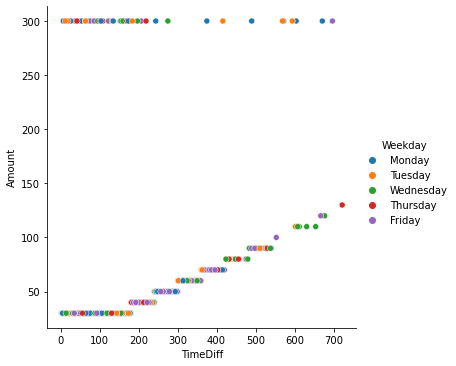

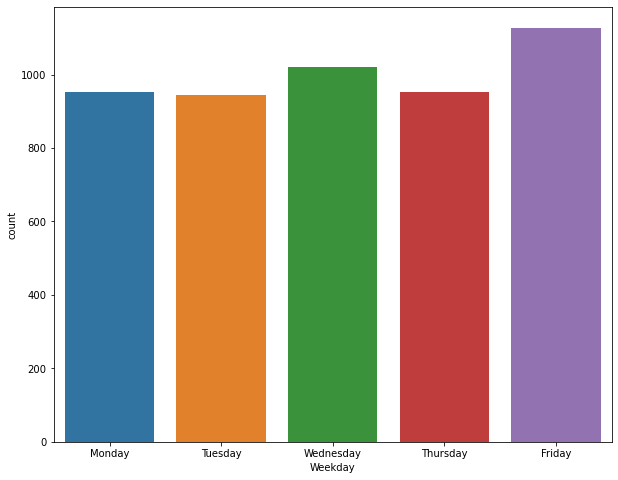

 ------------------------------------ 


 ------------------------------------ 
 ------------ Weekend ------------- 


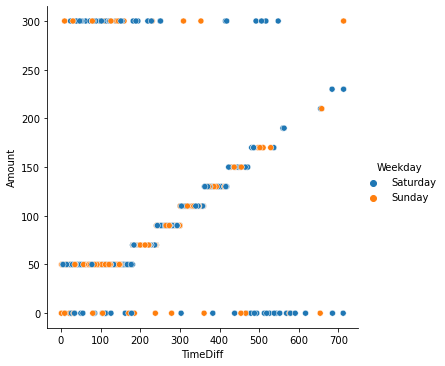

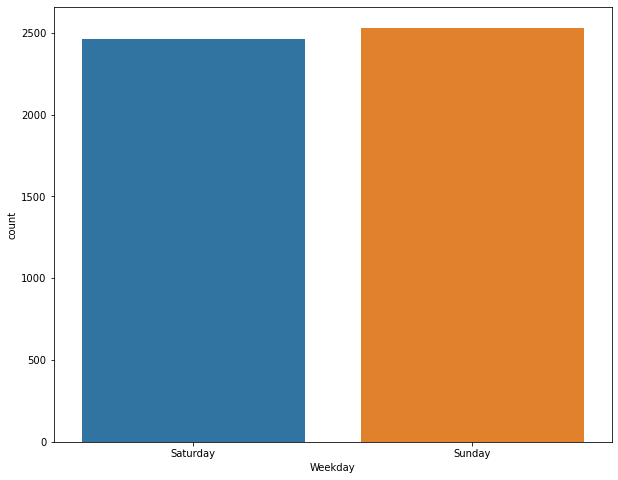

In [10]:
sns.relplot(data=data, x="TimeDiff", y="Amount", hue="Weekday")

plt.figure(figsize=(10,8))
sns.countplot(x='Weekday', data=data)
plt.show()

print(" ------------------------------------ ")
print("\n")

print(" ------------------------------------ ")

print(" ------------ Weekend ------------- ")

sns.relplot(data=data_s, x="TimeDiff", y="Amount", hue="Weekday")

plt.figure(figsize=(10,8))
sns.countplot(x='Weekday', data=data_s)
plt.show()

In [11]:
## droping feilds of ticket lost as they are behaving like outlier, other solution is that we can replace the \
## amount value by the actual value for the time they have parked their cars

#droping
data=data[data["Amount"]<300]
data["Amount"].value_counts()

30     3729
40      753
50      298
60       90
70       35
80       20
90       13
110       6
120       2
130       1
100       1
Name: Amount, dtype: int64

In [12]:
## droping feilds of ticket lost as they are behaving like outlier, other solution is that we can replace the \
## amount value by the actual value for the time they have parked their cars

#droping
data_s=data_s[data_s["Amount"]<300]
data_s=data_s[data_s["Amount"]>0]
data_s["Amount"].value_counts()

50     3307
70      962
90      379
110     161
130      46
150      23
170       9
190       3
230       2
210       2
Name: Amount, dtype: int64

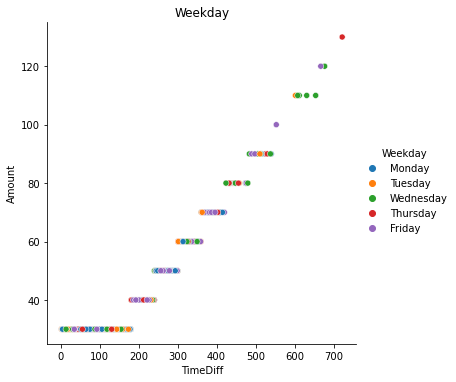

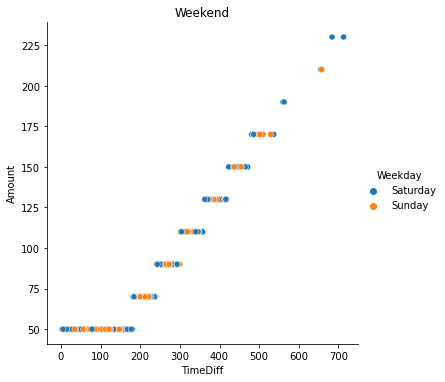

In [13]:
sns.relplot(data=data, x="TimeDiff", y="Amount", hue="Weekday").set(title="Weekday")

sns.relplot(data=data_s, x="TimeDiff", y="Amount", hue="Weekday").set(title="Weekend")

### we have to add the new coloumn for vechicle type if any, based on pricing structure.

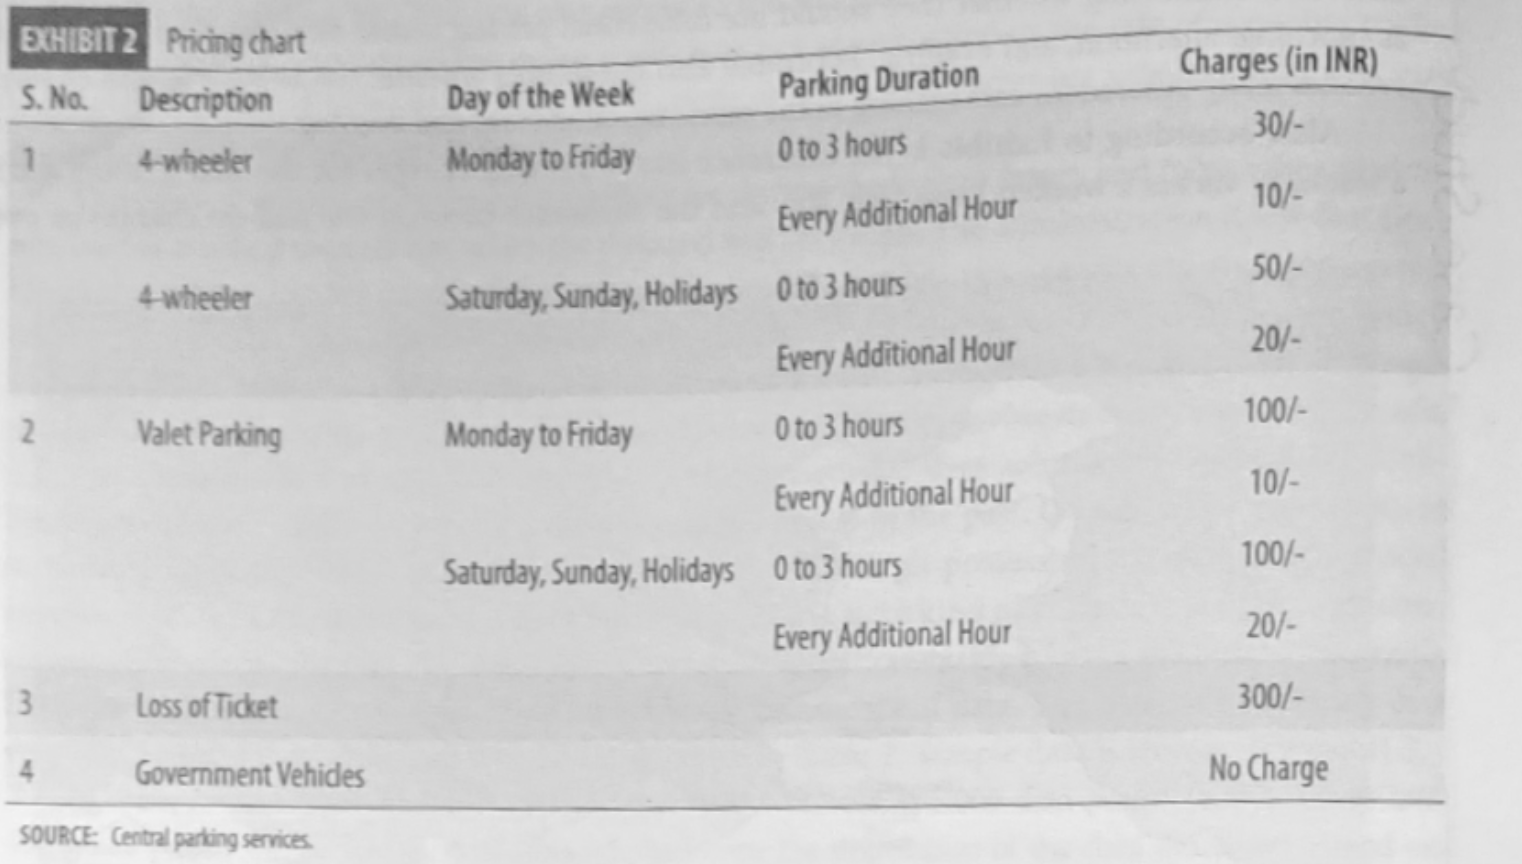

In [14]:
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday


In [15]:
data[(data["Amount"]>30) & (data["TimeDiff"]<=180)] #cheching vallet parking

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday


observation - NO VALET PARKING

Whole data belong to 4-wheeler parking

In [16]:
data_s[(data_s["Amount"]>60) & (data_s["TimeDiff"]<=180)] #cheching vallet parking

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday


No vallet parking only, 4 wheeler data.

### Adding colloumn for timing, if 
### morning (00:00:00 - 12:00:00), 
### afternoon (12:00:00 - 18:00:00),
### evening (18:00:00 - 00:00:00)

In [17]:
#data["Timing"]=np.where((data["Time In"]>=dt.time(hour=0)) & (data["Time In"]<dt.time(hour=12)), "Morning","Evening")
#data["Timing"]=np.where((data["Time In"]>=dt.time(hour=12)) & (data["Time In"]<dt.time(hour=18)), "Afternoon", )

In [18]:
# create a list of our conditions
conditions = [
    ((data["Time In"]>=dt.time(hour=0)) & (data["Time In"]<dt.time(hour=12))),
    ((data["Time In"]>=dt.time(hour=12)) & (data["Time In"]<dt.time(hour=18))),
    ((data["Time In"]>=dt.time(hour=18)) & (data["Time In"]<dt.time(hour=23, minute=59)))
    ]

# create a list of the values we want to assign for each condition
values = ['Morning', 'Afternoon', 'Evening']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Timing'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday,Afternoon
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday,Afternoon
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday,Afternoon
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday,Afternoon
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday,Afternoon


In [19]:
data["Timing"]

0       Afternoon
1       Afternoon
2       Afternoon
3       Afternoon
4       Afternoon
          ...    
4994      Morning
4995    Afternoon
4997      Morning
4998    Afternoon
4999      Evening
Name: Timing, Length: 4948, dtype: object

In [20]:
tim=data["Timing"].value_counts()
tim

Afternoon    2746
Evening      1745
Morning       457
Name: Timing, dtype: int64

In [21]:
# create a list of our conditions for weekend
conditions = [
    ((data_s["Time In"]>=dt.time(hour=0)) & (data_s["Time In"]<dt.time(hour=12))),
    ((data_s["Time In"]>=dt.time(hour=12)) & (data_s["Time In"]<dt.time(hour=18))),
    ((data_s["Time In"]>=dt.time(hour=18)) & (data_s["Time In"]<dt.time(hour=23, minute=59)))
    ]

# create a list of the values we want to assign for each condition
values = ['Morning', 'Afternoon', 'Evening']

# create a new column and use np.select to assign values to it using our lists as arguments
data_s['Timing'] = np.select(conditions, values)

# display updated DataFrame
data_s.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday,Morning
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday,Morning
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday,Afternoon
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday,Afternoon
5,1,8,2009-07-04,14:43:00,2009-07-04,17:15:00,50,152,Ticket,Saturday,Afternoon


In [22]:
tim_w=data_s["Timing"].value_counts()
tim_w

Afternoon    2737
Evening      1800
Morning       357
Name: Timing, dtype: int64

### Now lets conclude some insights from data - timing

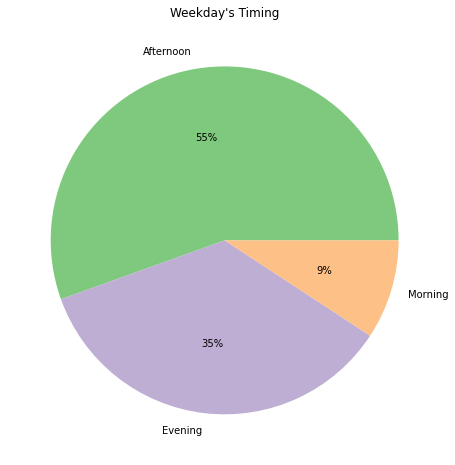

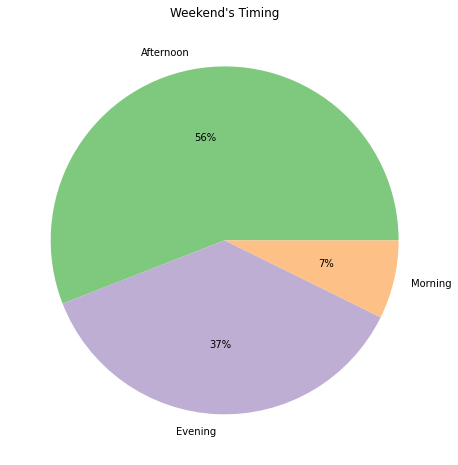

In [23]:
plt.figure(figsize=(10,8))
# declaring data
piedata = [tim[0],tim[1],tim[2]]
keys = ["Afternoon", "Evening", "Morning"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('Accent')
  
# plotting data on chart
plt.pie(piedata, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Weekday's Timing")
# displaying chart
plt.show()

######################################### weekend #################

plt.figure(figsize=(10,8))
# declaring data
piedata = [tim_w[0],tim_w[1],tim_w[2]]
keys = ["Afternoon", "Evening", "Morning"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('Accent')
  
# plotting data on chart
plt.pie(piedata, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Weekend's Timing")
# displaying chart
plt.show()

Most visiters for weekdays and weekends are in afternoon.

### Distribution of time spent by vehicles

In [24]:
# population parameters

data_mean=np.mean(data["TimeDiff"])
print("Mean of Time Diff = ",data_mean)
data_median=np.median(data["TimeDiff"])
print("Median of Time Diff = ",data_median)
data_mode=data["TimeDiff"].mode()
print("Mode of Time Diff = ",data_mode)


Mean of Time Diff =  135.4678658043654
Median of Time Diff =  121.5
Mode of Time Diff =  0    96
dtype: int64


## Normal Distribution ???

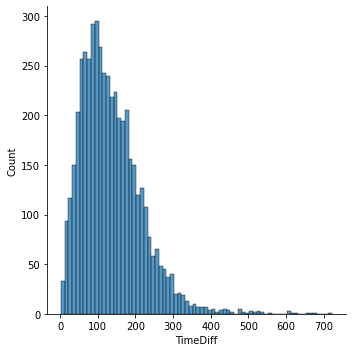

In [25]:
## Histogram

sns.displot(data, x="TimeDiff", binwidth=10)

less normally but more exponentially distributed

In [26]:
data.skew(axis = 0, skipna = True)

Vehicle      0.000000
Equipment    1.590326
Amount       3.565794
TimeDiff     1.405606
dtype: float64

.If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
. If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
. If the skewness is less than -1 or greater than 1, the data are highly skewed

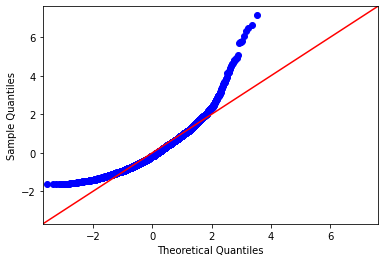

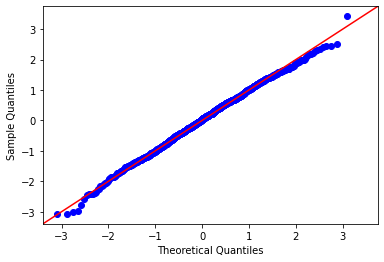

In [27]:
# qq plot
from scipy.stats import norm

sm.qqplot(data["TimeDiff"],fit=True, line ='45')
my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='45')
py.show()

In [28]:
## ks test

from scipy.stats import kstest
x = kstest(data["TimeDiff"], 'norm')  
print(x)

KstestResult(statistic=0.9991599213208184, pvalue=0.0)


If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution

In [29]:
from scipy.stats import shapiro

x=shapiro(data["TimeDiff"])
print(round(x[1],3))

0.0


## Distribution for weekend?

In [30]:
# population parameters

data_mean=np.mean(data_s["TimeDiff"])
print("Mean of Time Diff = ",data_mean)
data_median=np.median(data_s["TimeDiff"])
print("Median of Time Diff = ",data_median)
data_mode=data_s["TimeDiff"].mode()
print("Mode of Time Diff = ",data_mode)

Mean of Time Diff =  151.96955455659992
Median of Time Diff =  141.0
Mode of Time Diff =  0    127
1    137
2    188
dtype: int64


q4. people are spending more time on weekends as compared to weekdays as mean and median is higher in weekends.

In [31]:


data_mean=np.mean(data_s["TimeDiff"])
print("Mean of Time Diff = ",data_mean)
data_median=np.median(data_s["TimeDiff"])
print("Median of Time Diff = ",data_median)
data_mode=data_s["TimeDiff"].mode()
print("Mode of Time Diff = ",data_mode)

Mean of Time Diff =  151.96955455659992
Median of Time Diff =  141.0
Mode of Time Diff =  0    127
1    137
2    188
dtype: int64


In [32]:
data_s.skew(axis = 0, skipna = True)

Vehicle      0.000000
Equipment    0.975303
Amount       2.574351
TimeDiff     1.056902
dtype: float64

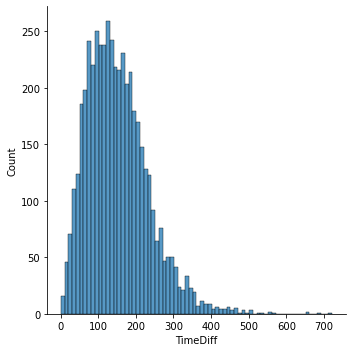

In [33]:
sns.displot(data_s, x="TimeDiff", binwidth=10)

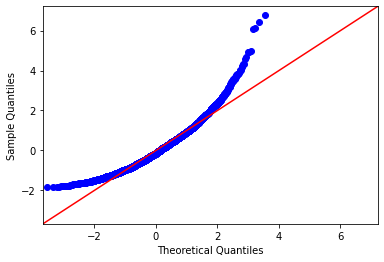

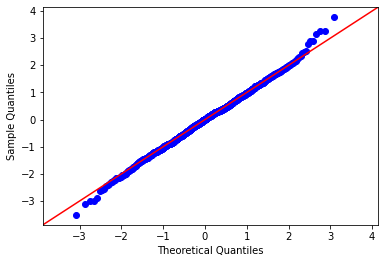

In [34]:
# qq plot
from scipy.stats import norm

sm.qqplot(data_s["TimeDiff"],fit=True, line ='45')
my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='45')
py.show()

## Q5 ....

In [42]:
# Q5

# create a list of our conditions
conditions = [
    ((data["Time In"]>=dt.time(hour=10)) & (data["Time In"]<dt.time(hour=14))),
    ((data["Time In"]>=dt.time(hour=14)) & (data["Time In"]<dt.time(hour=18))),
    ((data["Time In"]>=dt.time(hour=18)) & (data["Time In"]<dt.time(hour=23, minute=59)))
    ]

# create a list of the values we want to assign for each condition
values = ['Morning', 'Afternoon', 'Evening']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Timing'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing,new price
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday,Morning,40
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday,Afternoon,30
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday,Afternoon,30
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday,Afternoon,20
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday,Afternoon,30


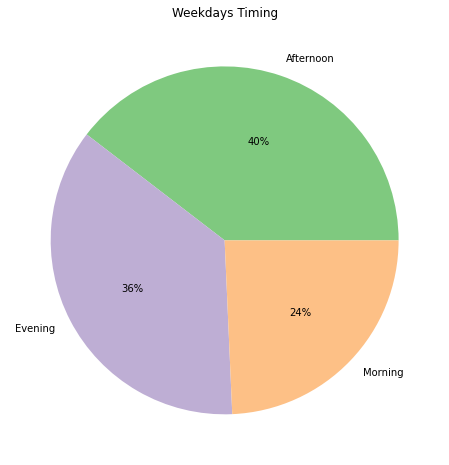

In [43]:
tim_w=data["Timing"].value_counts()
tim_w

plt.figure(figsize=(10,8))
# declaring data
piedata = [tim_w[0],tim_w[1],tim_w[2]]
keys = ["Afternoon", "Evening", "Morning"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('Accent')
  
# plotting data on chart
plt.pie(piedata, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Weekdays Timing")
# displaying chart
plt.show()

In [35]:
# Q5

# create a list of our conditions
conditions = [
    ((data_s["Time In"]>=dt.time(hour=10)) & (data_s["Time In"]<dt.time(hour=14))),
    ((data_s["Time In"]>=dt.time(hour=14)) & (data_s["Time In"]<dt.time(hour=18))),
    ((data_s["Time In"]>=dt.time(hour=18)) & (data_s["Time In"]<dt.time(hour=23, minute=59)))
    ]

# create a list of the values we want to assign for each condition
values = ['Morning', 'Afternoon', 'Evening']

# create a new column and use np.select to assign values to it using our lists as arguments
data_s['Timing'] = np.select(conditions, values)

# display updated DataFrame
data_s.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing
0,1,6,2009-07-04,10:39:00,2009-07-04,14:13:00,70,214,Ticket,Saturday,Morning
1,1,5,2009-07-04,11:00:00,2009-07-04,12:47:00,50,107,Ticket,Saturday,Morning
3,1,6,2009-07-04,12:56:00,2009-07-04,16:58:00,90,242,Ticket,Saturday,Morning
4,1,5,2009-07-04,13:57:00,2009-07-04,16:04:00,50,127,Ticket,Saturday,Morning
5,1,8,2009-07-04,14:43:00,2009-07-04,17:15:00,50,152,Ticket,Saturday,Afternoon


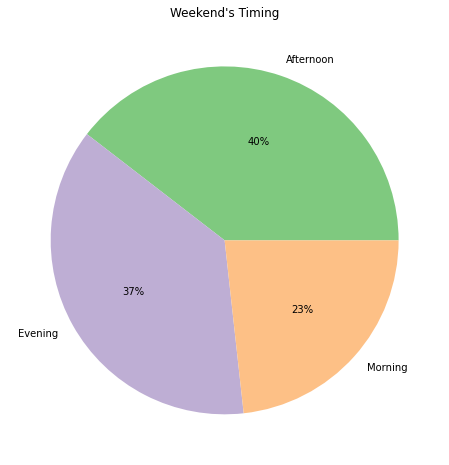

In [36]:
tim_w=data_s["Timing"].value_counts()
tim_w

plt.figure(figsize=(10,8))
# declaring data
piedata = [tim_w[0],tim_w[1],tim_w[2]]
keys = ["Afternoon", "Evening", "Morning"]
  
# define Seaborn color palette to use
palette_color = sns.color_palette('Accent')
  
# plotting data on chart
plt.pie(piedata, labels=keys, colors=palette_color, autopct='%.0f%%')

plt.title("Weekend's Timing")
# displaying chart
plt.show()

Yes, it is less during morning hours.

### Q6.. If charges for first 2 hr is 20 and 10 for every additional hour... financial effect.

In [37]:
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday,Afternoon
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday,Afternoon
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday,Afternoon
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday,Afternoon
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday,Afternoon


In [38]:
def price(a):
    a=a-120
    amount=20
    while(a>0):
        amount=amount+10
        a=a-60
    return amount
data["new price"]= data.apply(lambda row : price(row['TimeDiff']),axis = 1)

In [39]:
data.head()

,Vehicle,Equipment,DateIn,Time In,DateOut,Time Out,Amount,TimeDiff,Ticket_Type,Weekday,Timing,new price
0,1,5,2009-07-06,13:42:00,2009-07-06,17:25:00,40,223,Ticket,Monday,Afternoon,40
1,1,5,2009-07-06,14:01:00,2009-07-06,16:23:00,30,142,Ticket,Monday,Afternoon,30
2,1,6,2009-07-06,15:25:00,2009-07-06,17:44:00,30,139,Ticket,Monday,Afternoon,30
3,1,6,2009-07-06,17:05:00,2009-07-06,18:41:00,30,96,Ticket,Monday,Afternoon,20
4,1,5,2009-07-06,17:18:00,2009-07-06,19:57:00,30,159,Ticket,Monday,Afternoon,30


In [40]:
data["Amount"].sum()-data["new price"].sum()

24440

They will be in loss of 24440 rupees.

### Analyst claim- aternate hypo- average ocupancy is not utmost 2 hr for weekdays. alpha - 0.05 . pop var=sam var


h null : mean <=120 

h alter : mean >120

If your P value is less than the chosen significance level then you reject the null hypothesis. 

In [41]:
sample_data=data.sample(frac=0.1)
from statsmodels.stats.weightstats import ztest
alpha=0.05

ztest_Score, p_value= ztest(sample_data["TimeDiff"],value = 120, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the 
# p-value with alpha, if it is greater than alpha then we do not null hypothesis 
# else we reject it.
  
if(p_value <  alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Reject Null Hypothesis


### Thank you !!!!!